In [ ]:
#STEP 1, 2 and 3

In [1]:
# Step 2 Data Cleaning
#Basic data cleaning and checks
import pandas as pd

# Load the dataset
df = pd.read_excel('customer.xlsx')

# Display basic info to understand the data types and look for potential issues
print(df.info())

# Step 1: Handle missing values
# Option 1: Drop missing values (if the dataset is large and missing data is minimal)
# df.dropna(inplace=True)

# Option 2: Fill missing values (with mean/median for numerical columns or mode for categorical columns)
# For numerical columns
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Spending Score'].fillna(df['Spending Score'].median(), inplace=True)
df['Satisfaction Level'].fillna(df['Satisfaction Level'].median(), inplace=True)

# For categorical columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)

# Step 2: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 3: Convert data types if necessary
# E.g., converting 'Education Level' to a categorical type if it's not already
df['Education Level'] = df['Education Level'].astype('category')

# Step 4: Encode categorical variables if planning to use the data for machine learning models
# This step is optional and based on your needs
# Example for encoding 'Gender'
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Check the cleaned data
print(df.head())
print(df.info())

# Save the cleaned dataset to a new file if needed
df.to_excel('customer_cleaned.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          525 non-null    int64  
 1   Age                 524 non-null    float64
 2   Gender              523 non-null    object 
 3   Income              518 non-null    float64
 4   Education Level     523 non-null    object 
 5   Spending Score      518 non-null    float64
 6   Satisfaction Level  516 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 28.8+ KB
None
   CustomerID   Age   Income Education Level  Spending Score  \
0          35  29.0  10000.0     Associate's            93.0   
1          30  19.0  25000.0     High School            90.0   
2          79  22.0  25000.0     High School            91.0   
3          53  33.0  35000.0      Bachelor's            70.0   
4          56  28.0  39000.0     Associate's            90.0   

  

C:\Users\jfg22\AppData\Local\Temp\ipykernel_31996\1821284081.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\jfg22\AppData\Local\Temp\ipykernel_31996\1821284081.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [2]:
#Step 2 EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_excel('customer_cleaned.xlsx')

In [4]:
# Basic structure of the dataset
df.head() # Display the first few rows

,CustomerID,Age,Income,Education Level,Spending Score,Satisfaction Level,Gender_Male,Gender_Other
0,35,29.0,10000,Associate's,93,8,False,False
1,30,19.0,25000,High School,90,9,True,False
2,79,22.0,25000,High School,91,9,True,False
3,53,33.0,35000,Bachelor's,70,8,True,False
4,56,28.0,39000,Associate's,90,8,False,False


In [5]:
df.describe() # Summary statistics

,CustomerID,Age,Income,Spending Score,Satisfaction Level
count,525.000000,525.000000,525.000000,525.000000,525.000000
mean,263.000000,40.692748,87442.857143,64.165714,7.567619
std,151.698715,9.316276,50296.103868,15.291854,0.953949
min,1.000000,19.000000,10000.000000,31.000000,6.000000
25%,132.000000,34.000000,69000.000000,52.000000,7.000000
50%,263.000000,40.000000,81500.000000,60.000000,8.000000
75%,394.000000,47.000000,96000.000000,78.000000,8.000000
max,525.000000,150.000000,1000000.000000,100.000000,9.000000


In [6]:
df.info() # Info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          525 non-null    int64  
 1   Age                 525 non-null    float64
 2   Income              525 non-null    int64  
 3   Education Level     525 non-null    object 
 4   Spending Score      525 non-null    int64  
 5   Satisfaction Level  525 non-null    int64  
 6   Gender_Male         525 non-null    bool   
 7   Gender_Other        525 non-null    bool   
dtypes: bool(2), float64(1), int64(4), object(1)
memory usage: 25.8+ KB


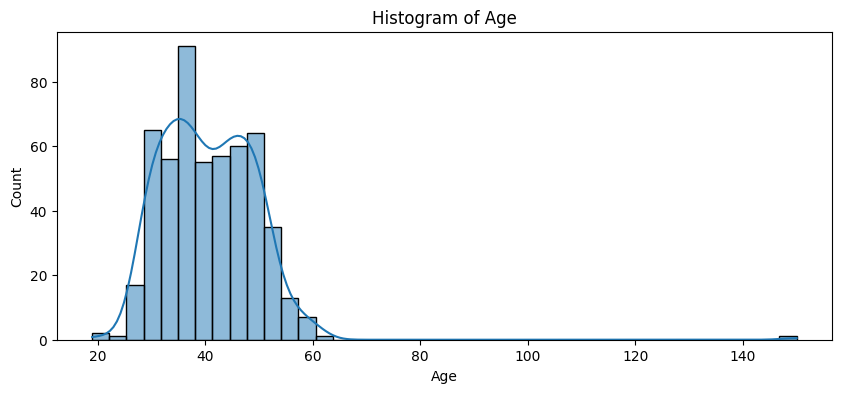

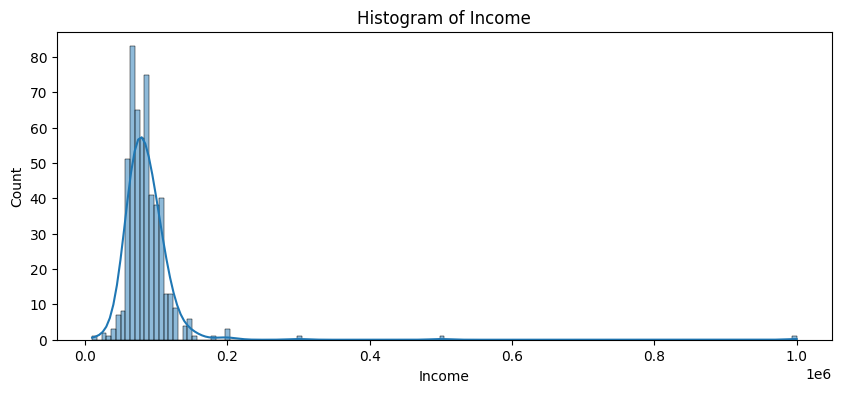

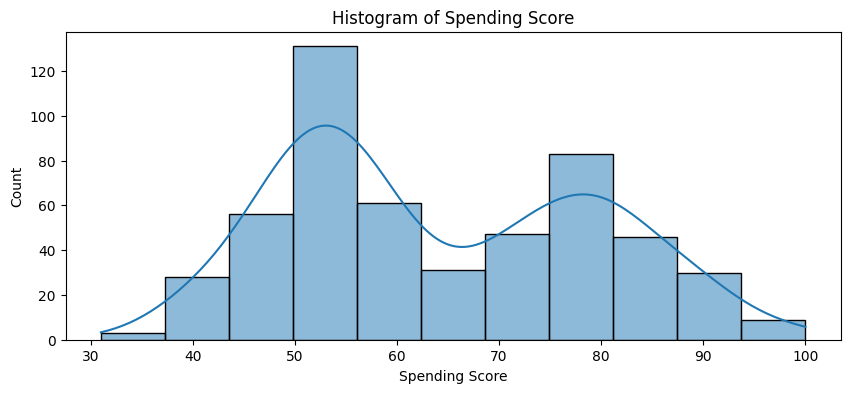

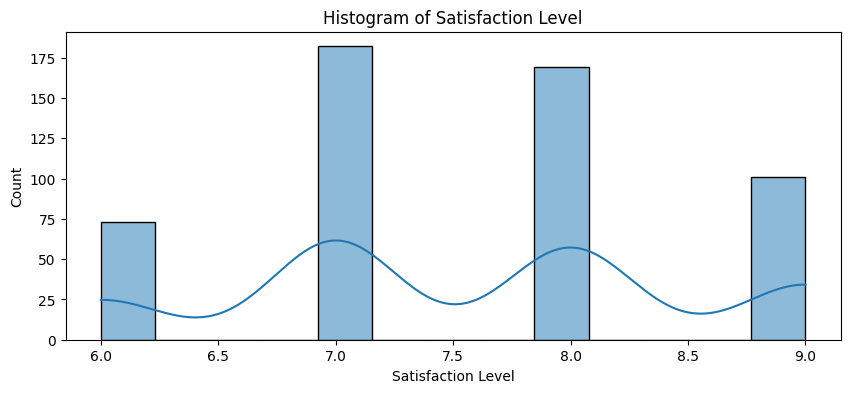

In [7]:
# EDA: Visualization

# Histograms for numerical data
numerical_columns = ['Age', 'Income', 'Spending Score', 'Satisfaction Level']
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

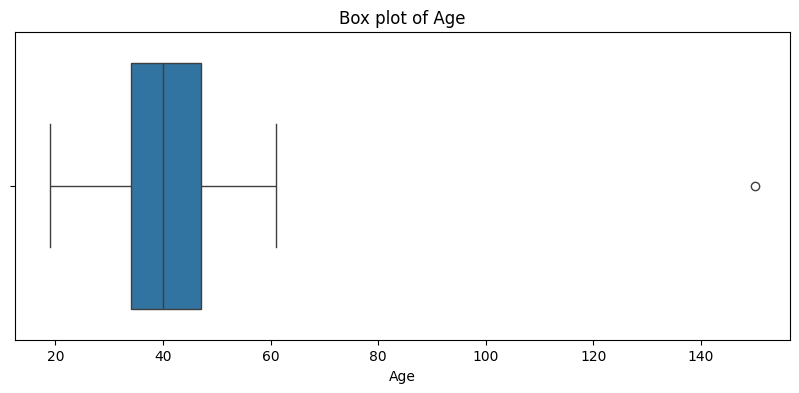

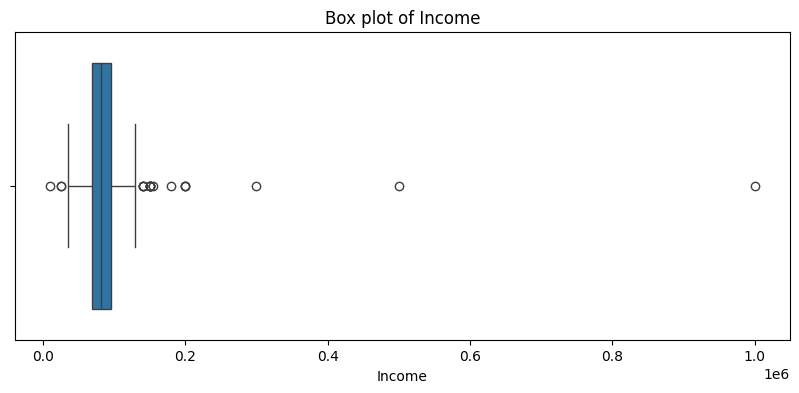

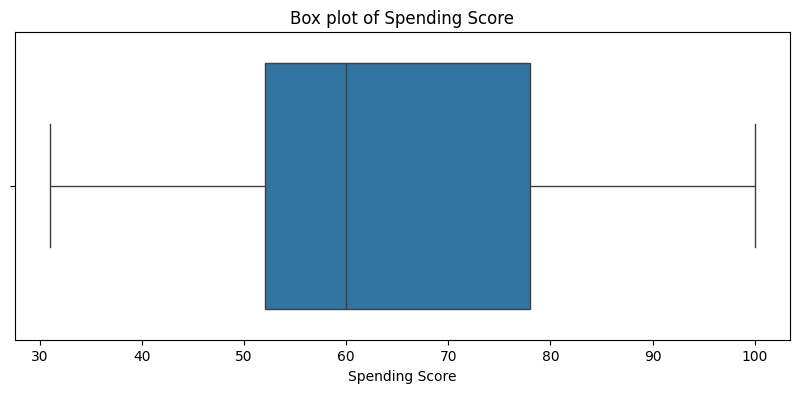

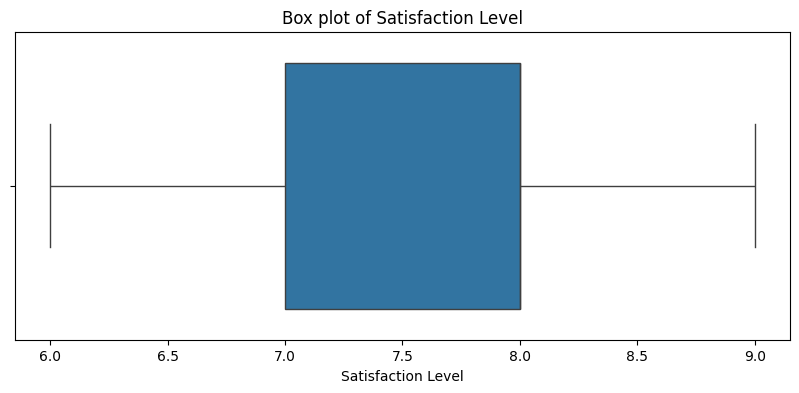

In [8]:
# Box plots for numerical data to identify outliers
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

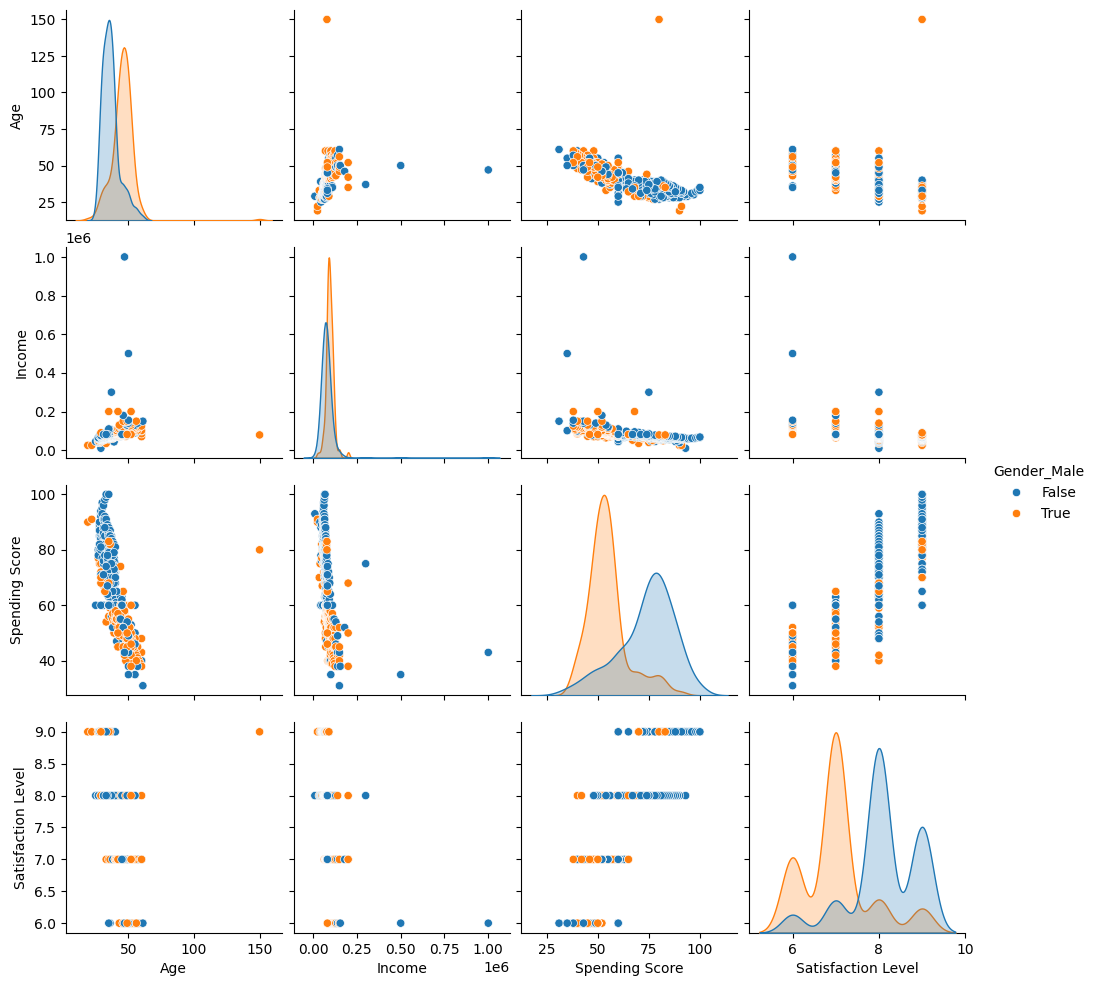

In [10]:
# Scatterplots for relationships between numerical variables
sns.pairplot(df, hue='Gender_Male', vars=numerical_columns)
plt.show()

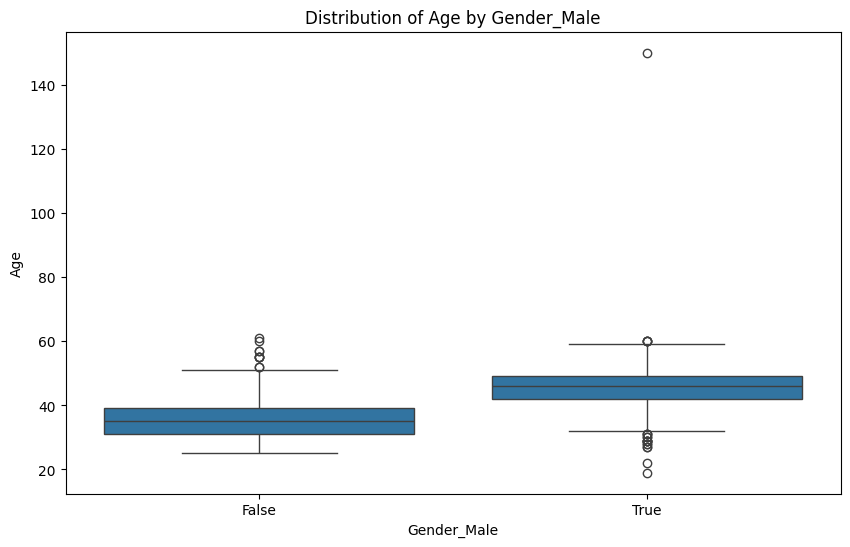

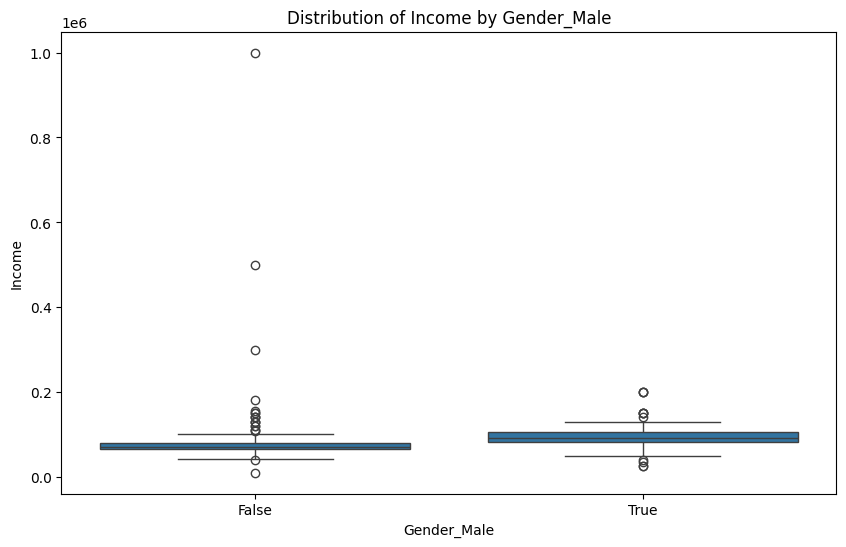

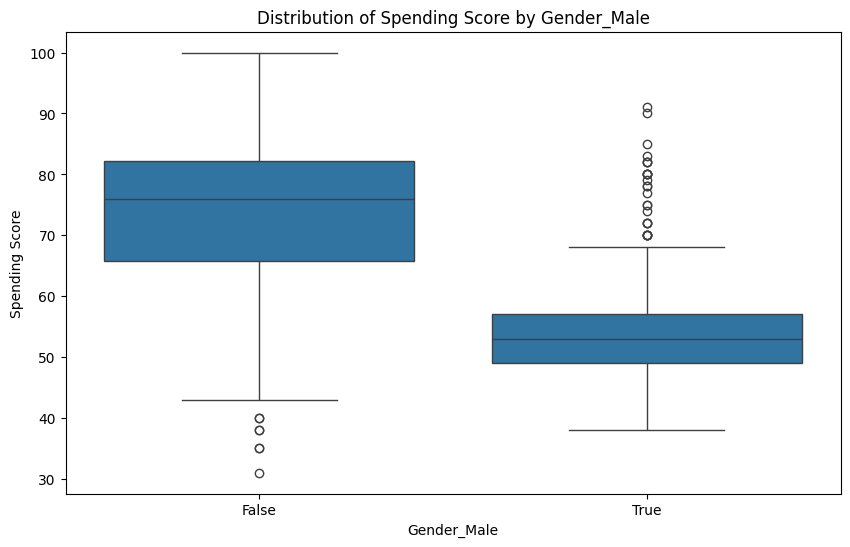

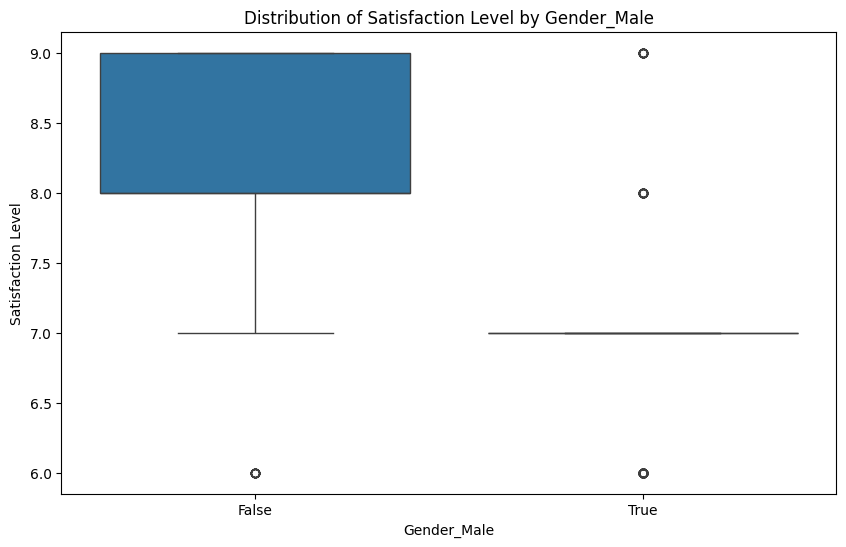

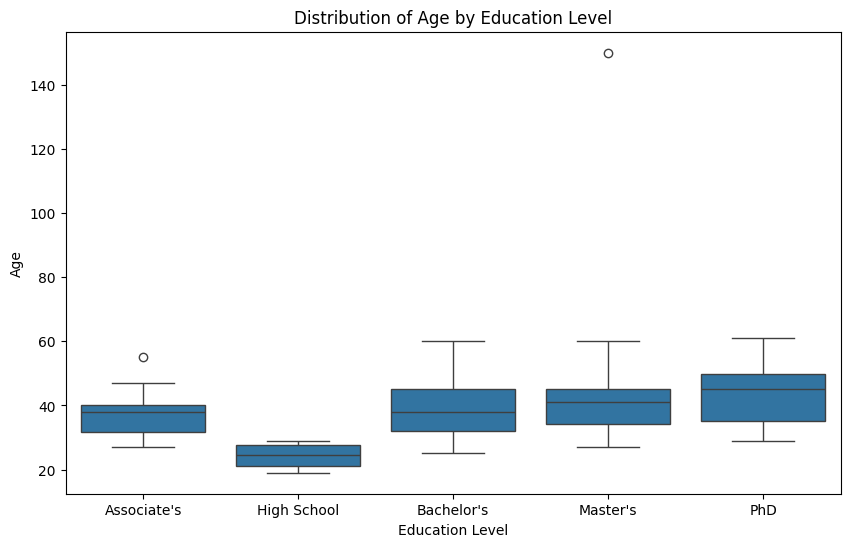

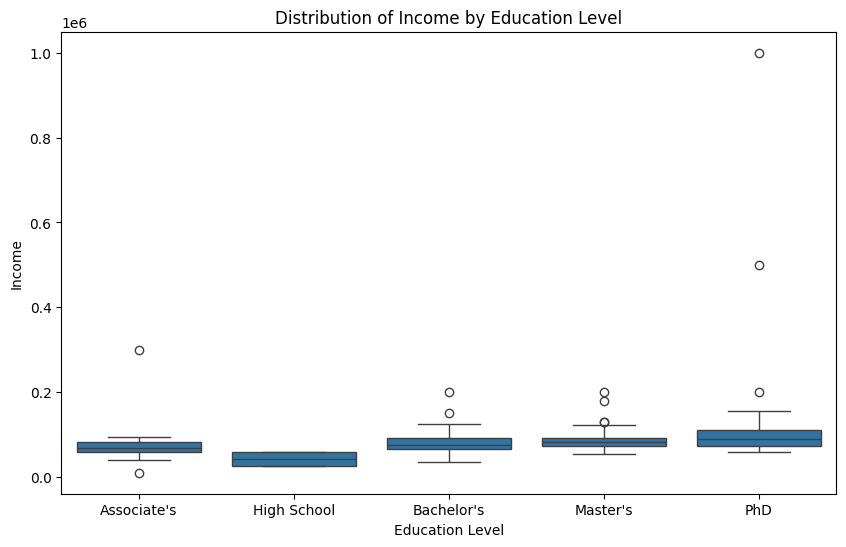

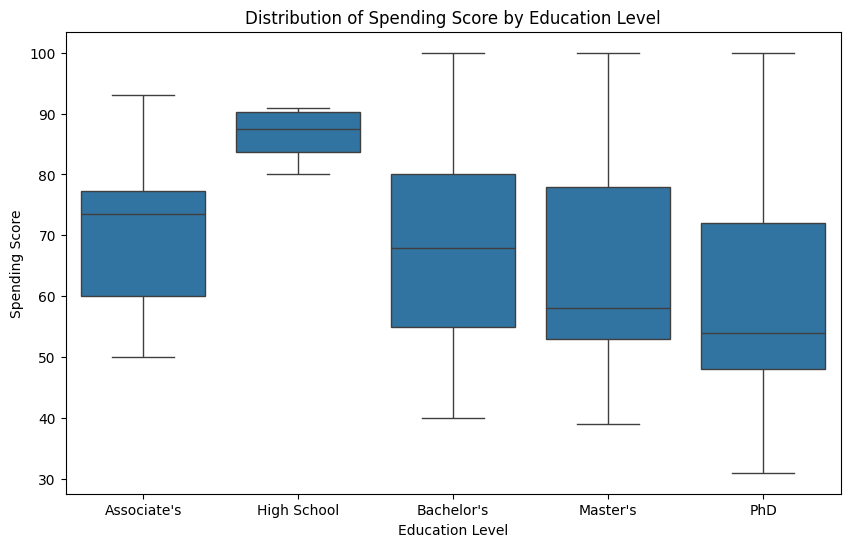

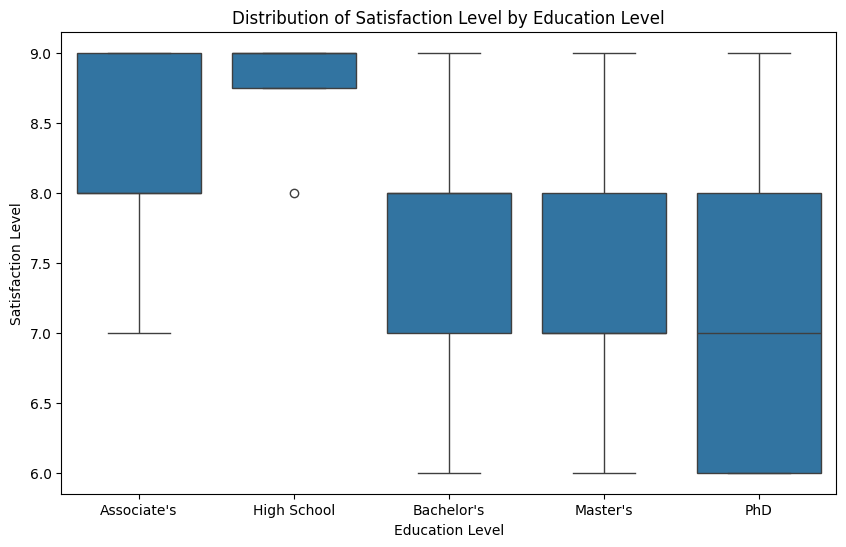

In [11]:
# Box plots for comparing distributions between categories
categorical_columns = ['Gender_Male', 'Education Level']
for cat_column in categorical_columns:
    for num_column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'Distribution of {num_column} by {cat_column}')
        plt.show()
#########################################
#########################################
#########################################

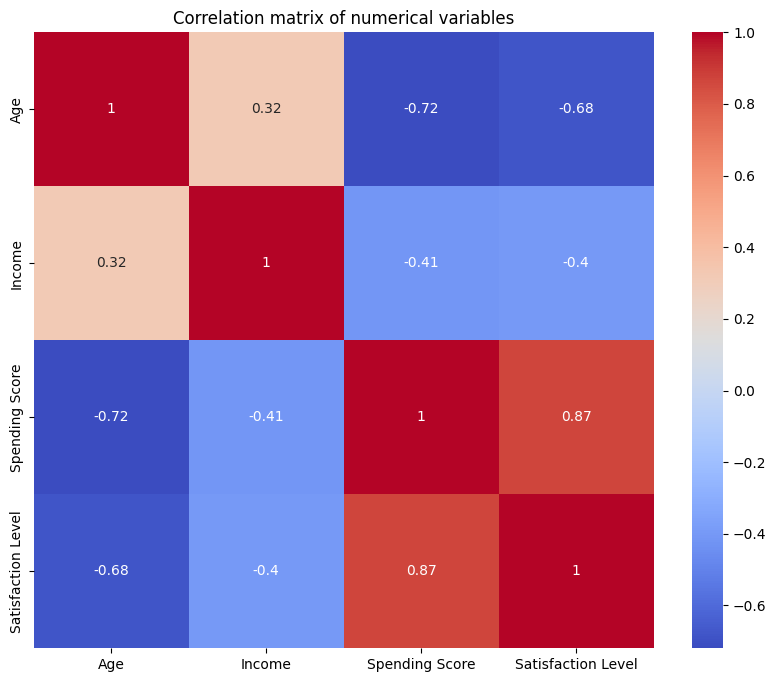

In [12]:
# Step 3 -  
#Checking for correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical variables')
plt.show()

In [ ]:
#Step 4 - Hypothesis test - check whether the overall mean of the 
#field satisfaction level is not equal to 7

In [13]:
import pandas as pd
from scipy import stats

# Load the cleaned dataset ALREADY LOADED ABOVE
# df = pd.read_excel('customer_cleaned.xlsx')

# Assuming 'Satisfaction Level' is the column we are interested in
satisfaction_levels = df['Satisfaction Level'].dropna() # Dropping any missing values to ensure the t-test can run

# Conduct the one-sample t-test against the hypothesized mean (7)
t_statistic, p_value = stats.ttest_1samp(satisfaction_levels, popmean=7)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05 # Common choice for significance level
if p_value < alpha:
    print("We reject the null hypothesis. There is sufficient evidence to say that the mean Satisfaction Level is not equal to 7.")
else:
    print("We fail to reject the null hypothesis. There is not sufficient evidence to say that the mean Satisfaction Level is not equal to 7.")


T-Statistic: 13.633632374041511
P-Value: 1.9308315031620856e-36
We reject the null hypothesis. There is sufficient evidence to say that the mean Satisfaction Level is not equal to 7.


In [ ]:
#Step 5 - Confidence Interval

In [14]:
from scipy import stats
import numpy as np

satisfaction_level = df['Satisfaction Level'].dropna()  # Ensure no NaN values
mean, sigma = np.mean(satisfaction_level), np.std(satisfaction_level, ddof=1)

confidence_interval = stats.norm.interval(0.95, loc=mean, scale=sigma/np.sqrt(len(satisfaction_level)))

print(f"95% confidence interval for the mean Satisfaction Level: {confidence_interval}")


95% confidence interval for the mean Satisfaction Level: (np.float64(7.4860184250006405), np.float64(7.649219670237455))


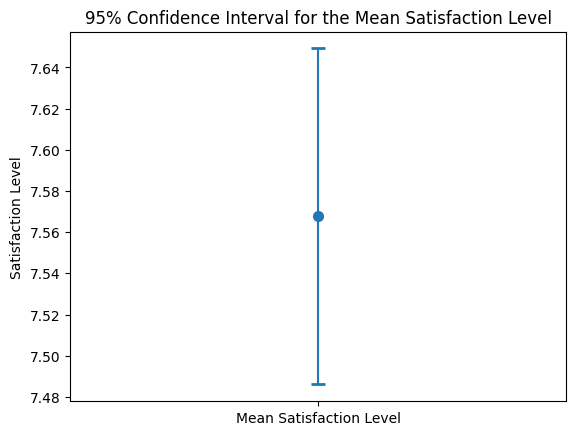

In [18]:
import matplotlib.pyplot as plt

# Mean and confidence interval
mean = np.mean(satisfaction_level)
lower_bound, upper_bound = confidence_interval

# Plotting the error bar plot
plt.errorbar(x=1, y=mean, yerr=[[mean-lower_bound], [upper_bound-mean]], fmt='o', capsize=5, capthick=2, markeredgewidth=2)
plt.xlim(0, 2)
plt.xticks([1], ['Mean Satisfaction Level'])
plt.title('95% Confidence Interval for the Mean Satisfaction Level')
plt.ylabel('Satisfaction Level')

plt.show()


In [ ]:
#Step 6 - Probability Distribution

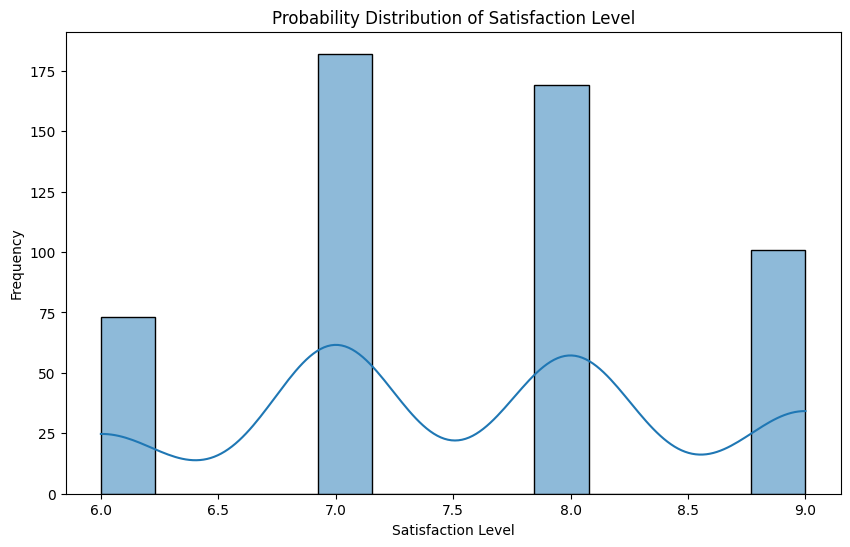

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(satisfaction_level, kde=True)
plt.title('Probability Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Step 7 - comparative analysis 

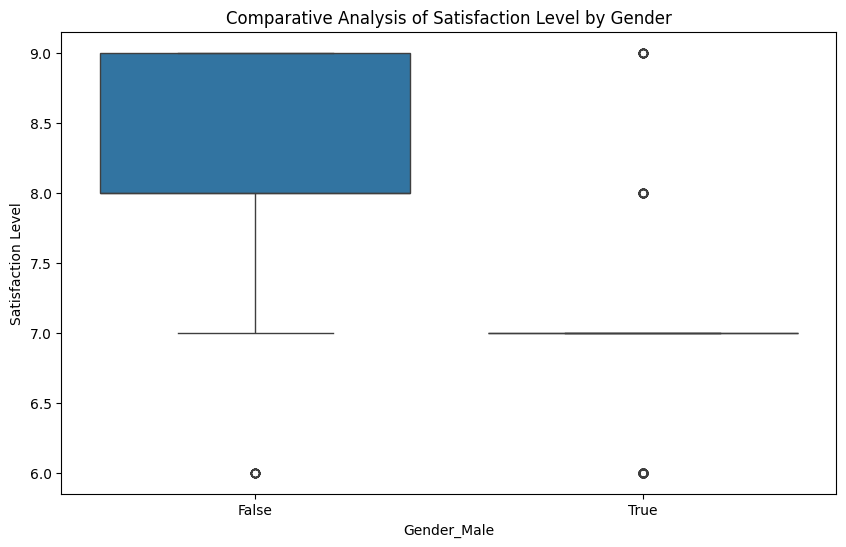

In [16]:
#compare the Satisfaction Level across different genders 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Satisfaction Level', data=df)
plt.title('Comparative Analysis of Satisfaction Level by Gender')
plt.show()


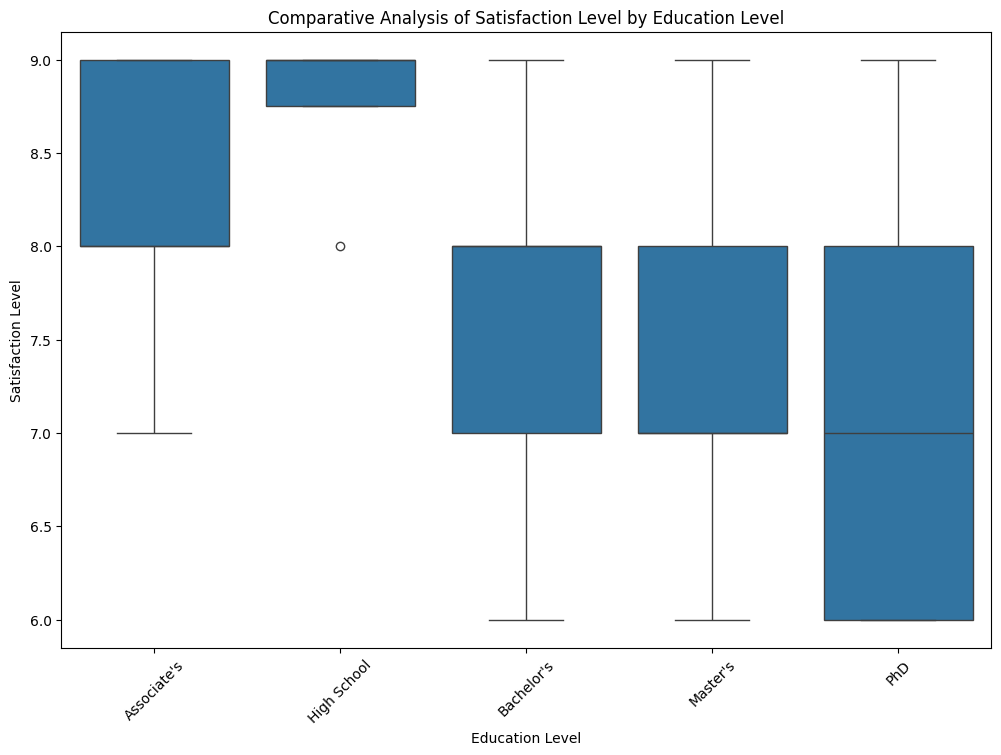

In [17]:
#education level
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education Level', y='Satisfaction Level', data=df)
plt.title('Comparative Analysis of Satisfaction Level by Education Level')
plt.xticks(rotation=45)  # If Education Level categories are lengthy
plt.show()
